In [11]:
import PIL
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# UDACITY

In [87]:
def read_images_classes(path):
    images_classes = []

    for image in glob.glob(path+'*.jpg'):

        filename, extension = image.split(".")
        text_file = open(filename+".txt", 'r').readlines()

        classes_idx = [ int(item[0]) for item in text_file]
        classes_idx.append(image)

        images_classes.append(classes_idx)
        
    return images_classes

In [20]:
train_path = "udacity2007/train/"
test_path = "udacity2007/test/"
valid_path = "udacity2007/valid/"

In [112]:
classes = {0:'Car',
           1:'Pedestrian',
           2:'Truck'}

In [90]:
train = read_images_classes(train_path)
valid = read_images_classes(test_path)
test = read_images_classes(valid_path)

## % per set

In [91]:
total = len(train) + len(valid) + len(test)

In [92]:
percentatge = [len(train)/total, len(valid)/total, len(test)/total]

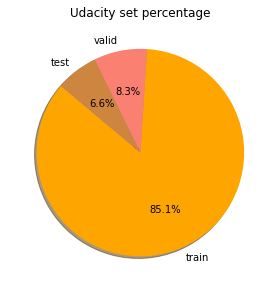

In [191]:
labels = ["train","valid", "test"]
colors = ['orange', 'salmon', 'peru']
#plt.legend(patches, labels, loc="best")
plt.pie(percentatge, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.title("Udacity set percentage")
#plt.axis('equal')
plt.show()

## % of class / set

In [174]:
def compute_classes(image, car,pedestrian,truck):
     
    #object_types =  np.array([ classes[item]  for index,item in enumerate(image) if index != len(image)-1 ])
    #np.unique(object_types, return_counts=True)
    
    for index,item in enumerate(image):
        if index != len(image)-1:
            if classes[item] == "Car":
                car +=1

            elif classes[item] == "Pedestrian":
                pedestrian +=1

            elif classes[item] == "Truck":  
                truck  +=1
            else:
                print ("Bad Class")
                
    return car,pedestrian,truck

In [238]:
#images_total = [train, valid, test]
def compute_number_of_classes (images_total):
    totals = []
    per = []
    for i in range(len(images_total)):
        no_class = 0
        car = 0
        pedestrian = 0
        truck = 0
        total =0
        percentatge = 0
        image_object_count = []
        
        for image in images_total[i]:
            
            if len(image) > 1:
                car, pedestrian, truck = compute_classes(image, car,pedestrian,truck)
                #image_object_count.append([image[len(image)-1], unique, count])
            else:
                no_class+=1

        total = car + pedestrian + truck
        percentatge = [car/total, pedestrian/total, truck/total]
        
        totals.append(total)
        per.append(percentatge)
    return totals, per


In [239]:
totals, percentages = compute_number_of_classes([train, valid, test])

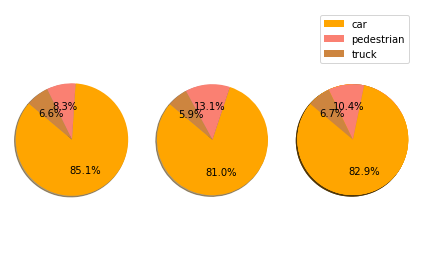

Train, Validation, Test
Total images per set:  [36174, 10083, 1966]


In [240]:
fig, axes = plt.subplots(ncols=3)

labels = ["car","pedestrian", "truck"]
colors = ['orange', 'salmon', 'peru']
sets = ["train", "valid", "test"]
for i,ax in enumerate(axes):
    
    patches, texts = plt.pie(percentages[i], colors=colors, shadow=True, startangle=90)
    plt.legend(patches, labels, loc="best")
    ax.pie(percentages[i], colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal')
    #plt.title("Classes in set : train, valid, test")
    plt.tight_layout()

plt.show()

print("Train, Validation, Test")
print ("Total images per set: ", totals)